<a href="https://colab.research.google.com/github/sofiadellarosa/FinalProjectDS/blob/main/DSproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Market Change after Natural Disaster

**Team Members:** Brandon Butler and Sofia Della Rosa

**Website Link:** https://sofiadellarosa.github.io/FinalProjectDS/

## Project Goal and Description:

The goal of this project is to analyze how certain natural disasters in different regions impact the housing market in the United States. We can use that information to see if property values decline after disasters and how quickly they recover. The natural disasters we will be looking at are: hurricanes, earthquake, drought, fire, flood, and tornadoes.

##Research Questions:
1. How do different types of natural disasters impact housing prices in affected regions?
2. What is the average recovery time for property values to return to pre-disaster levels?

##Data Sources:
1. FEMA Disaster Declarations Summaries: Provides records of federally declared disasters in the U.S., including type, location, and date.
2. Federal Housing Finance Agency’s HPI: Shows yearly house price changes at the ZIP code level.
3. US Zip Codes Database from SimpleMaps: Contains ZIP code to state mapping and geographic info sourced from the USPS, Census Bureau, and etc.


##Collaboration Plan:

For this project, we have a collaboration plan to make sure we have efficient workflow and collaboration. We meet in person every Wednesday to work on the project together. We communicate through text messages. We also use a shared Google Calendar to set up meetings and keep track of deadlines. We also set up a shared Google Drive where we store project documents and files. Inside the Google Drive is a To-Do Note file that we use to track our project tasks. Lastly, we made a GitHub repository to manage and coordinate our code efficiently.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import github stuff
%cd /content
!git clone https://github.com/sofiadellarosa/FinalProjectDS.git
%cd /content/drive/MyDrive/DSProjectFinal

/content
fatal: destination path 'FinalProjectDS' already exists and is not an empty directory.
/content/drive/MyDrive/DSProjectFinal


In [ ]:
import pandas as pd
import numpy as np
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [ ]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/DSProjectFinal/DSproject.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/DSProjectFinal/DSproject.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 403782 bytes to /content/drive/MyDrive/DSProjectFinal/DSproject.html


In [ ]:
%cd /content/FinalProjectDS
!unzip hpi_at_bdl_zip5.csv.zip
!unzip DisasterDeclarationsSummaries.csv.zip
!unzip uszips.csv.zip

/content/FinalProjectDS
Archive:  hpi_at_bdl_zip5.csv.zip
replace hpi_at_bdl_zip5.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  DisasterDeclarationsSummaries.csv.zip
replace DisasterDeclarationsSummaries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  uszips.csv.zip
  inflating: uszips.csv              
  inflating: __MACOSX/._uszips.csv   


In [ ]:
disasterDeclaration_df = pd.read_csv('/content/FinalProjectDS/DisasterDeclarationsSummaries.csv') # FEMA’s Disaster Declarations Summaries
hpi_df = pd.read_csv('/content/FinalProjectDS/hpi_at_bdl_zip5.csv') #Federal Housing Finance Agency's Annual House Price Indexes
zip_state_df = pd.read_csv('/content/FinalProjectDS/uszips.csv')

<ipython-input-11-b6cd2406d927>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  disasterDeclaration_df = pd.read_csv('/content/FinalProjectDS/DisasterDeclarationsSummaries.csv') # FEMA’s Disaster Declarations Summaries
<ipython-input-11-b6cd2406d927>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  hpi_df = pd.read_csv('/content/FinalProjectDS/hpi_at_bdl_zip5.csv') #Federal Housing Finance Agency's Annual House Price Indexes


##Table 1:

The first dataset we are working with is the Federal Housing Finance Agency's Annual House Price Indexes.

This dataset comes from the Federal Housing Finance Agency's website: https://www.fhfa.gov/data/hpi/datasets?tab=additional-data

This dataset contains House Price Index (HPI) data at the state and zip code levels. We chose this dataset because it provides a reliable measure of housing market trends over time. This will allow us to analyze how property values change in response to natural disasters and then track their recovery rates. A question we have for this dataset is how do house prices change in the years following a natural disaster? Another question is how long does it take for them to return to pre-disaster levels?

In [ ]:
# Show column types
print(hpi_df.dtypes)

HPI for Five-Digit ZIP Codes (All-Transactions Index)\nExperimental Indexes Showing Cumulative (Nominal) Annual Appreciation     object
Unnamed: 1                                                                                                                       object
Unnamed: 2                                                                                                                       object
Unnamed: 3                                                                                                                       object
Unnamed: 4                                                                                                                       object
Unnamed: 5                                                                                                                       object
Unnamed: 6                                                                                                                      float64
Unnamed: 7                                      

In [ ]:
"""
The purpose of this block is to fix the first 5 rows of the dataframe, which contains unwanted information
"""
# col 1: Five-Digit ZIP Code
# col 2: Year
# col 3: Annual Change (%)
# col 4: HPI
# Col 5: HPI with 1990 base
# col 6: HPI with 2000 base

hpi_df = hpi_df.iloc[5:].reset_index(drop=True) # Drop the first 5 rows (index 0 to 4), which contain metadata or unwanted information
hpi_df.columns = hpi_df.iloc[0] # Set the 5th row (now at index 0) as the column headers

hpi_df = hpi_df.drop(index=0) # Drop the first row since it is now used as the header

hpi_df = hpi_df.reset_index(drop=True) # Reset the index to ensure it starts from 0

#hpi_df.head()


In [ ]:
"""Removes unwanted columns from the dataframe"""
hpi_df = hpi_df.drop(hpi_df.columns[[6,7]], axis=1)
hpi_df[:50]

,Five-Digit ZIP Code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,01001,1984,.,100.00,52.27,51.34
1,01001,1985,15.86,115.86,60.56,59.49
2,01001,1986,16.22,134.66,70.38,69.14
3,01001,1987,21.66,163.83,85.63,84.12
4,01001,1988,16.99,191.66,100.18,98.41
5,01001,1989,1.32,194.19,101.50,99.71
6,01001,1990,-1.48,191.32,100.00,98.23
7,01001,1991,-5.49,180.81,94.51,92.84
8,01001,1992,-1.54,178.03,93.05,91.41
9,01001,1993,0.57,179.05,93.59,91.93


In [ ]:
# Show column types
print(hpi_df.dtypes)

0
Five-Digit ZIP Code    object
Year                   object
Annual Change (%)      object
HPI                    object
HPI with 1990 base     object
HPI with 2000 base     object
dtype: object


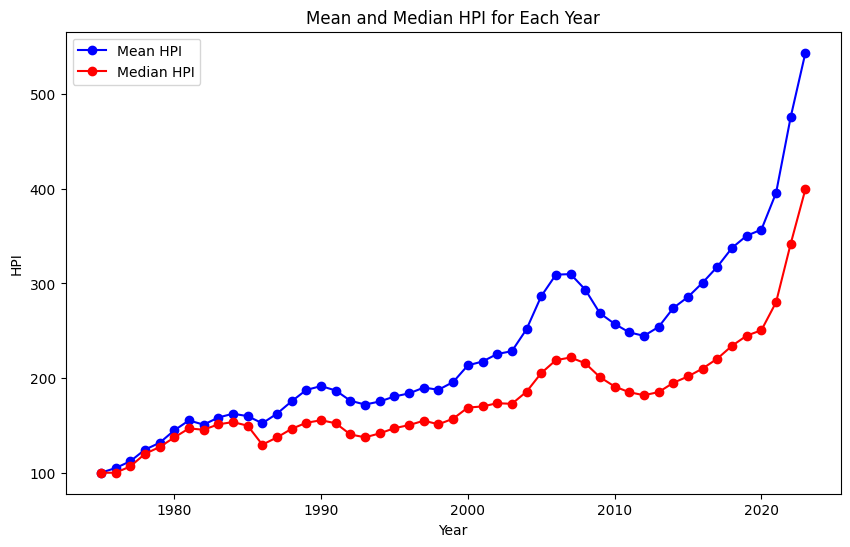

In [ ]:
"""
This block of code adjusts the types of HPI and Year values, drops all of the NaN values in HPI, and calculates the mean and median for each year

The mean and median are the measures of central tendancy used in the line graph also created in this block
"""
hpi_df['HPI'] = pd.to_numeric(hpi_df['HPI'], errors='coerce')
hpi_df['Year'] = pd.to_numeric(hpi_df['Year'], errors='coerce')


hpi_df = hpi_df.dropna(subset=['HPI']) # clean up values --> drop all NaN
mean_per_year = hpi_df.groupby('Year')['HPI'].mean() # calculate mean
ax = mean_per_year.plot(kind='line', marker='o', color='blue', figsize=(10, 6), label='Mean HPI')

median_per_year = hpi_df.groupby('Year')['HPI'].median() # calculate median
median_per_year.plot(kind='line', marker='o', color='red', ax=ax, label='Median HPI')

# Title and labels
ax.set_title('Mean and Median HPI for Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('HPI')

ax.legend()


The visualization above displays the mean and median housing price index per year, for each year from 1975 - 2023. It is helpful to see how housing prices fluctuate over time. Dips in the trendline could be due to a variety of economic factors, some having to do with the environment! Since the mean is consistently higher than the median, it could indicate that the housing market is skewed towards higher-priced homes. Natural disasters often impact different segments of the housing market in different ways. For example, high-value or luxury homes might see a more significant price drop or a longer recovery time, while more affordable homes may experience a quicker rebound or less volatility.

In [ ]:
# Some interesting Stats

# lowest and highest hpi years
highest_hpi = hpi_df.groupby('Year')['HPI'].mean().idxmax()
print(f"The year with the highest average HPI is {highest_hpi}.")

lowest_hpi = hpi_df.groupby('Year')['HPI'].mean().idxmin()
print(f"The year with the lowest average HPI is {lowest_hpi}.")

# year with most reported data
top_years = hpi_df['Year'].value_counts().head(5)
print(top_years)

print("The most frequent year reported in the data is")

#calculate standard deviation
std= hpi_df['HPI'].std()
print(f"The standard deviation of the HPI is {std}")

smallest = hpi_df.groupby('Five-Digit ZIP Code')['HPI'].mean().nsmallest(5)
smallest


The year with the highest average HPI is 2023.
The year with the lowest average HPI is 1975.
Year
2021    18818
2012    18795
2013    18782
2020    18771
2009    18730
Name: count, dtype: int64
The most frequent year reported in the data is
The standard deviation of the HPI is 235.45070972223266


,HPI
Five-Digit ZIP Code,
92230,72.109333
34449,76.544000
92249,78.201667
93219,79.705000
93256,80.571429


Some Summary Statistics
---

The years with the highest HPI is 2023, and the lowest is 1975. This should not be suprising based on market and housing trands, and this conclusion can also be drawn from looking at the graph

---


The most frequent year reported in the data is 2021. This is followed by 2012, 2013, 2020, 2009

*  The dataset includes more recent data
*  If a particular year is overrepresented, it might correspond to a major real estate event

---
The standard deviation is about 235.45


*   235.45 is relatively large, suggesting that the data points are spread out far from the mean value. Suggests a wide variability in the dataset.
*   A standard deviation of 235.45 could mean that housing prices vary quite a bit, depending on the range of prices (ex: a small neighborhood vs. a wide range of house prices).


---

The five zip codes with the smallest hpi are 92230, 34449, 92249, 93219, and 93256
1.  92230 – Blythe, California
Blythe is a city located in Riverside County, California, near the Arizona border.
2. 34449 – Homosassa, Florida
Homosassa is a census-designated place in Citrus County, Florida, located on the Gulf Coast.
3. 92249 – Calexico, California
Calexico is a city in Imperial County, California, located near the U.S.-Mexico border.
4. 93219 – Coalinga, California
Coalinga is a city in Fresno County, California, located in the San Joaquin Valley.
5. 93256 – Huron, California
Huron is a city in Fresno County, California, also located in the San Joaquin Valley.
* HPI in these areas could be due to variety of factors, like most of them are semi-rural. In terms of environmental factors, some of these areas, like Blythe and Coalinga, are located in desert regions or areas prone to extreme weather, which can make them less appealing for long-term living.




## Table 2:
The next dataset we are working with is FEMA’s Disaster Declarations Summaries.

This dataset comes from FEMA's website: https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2

This dataset lists all federally declared disasters with relevant attributes such as date, type, and duration. We chose this dataset because it provides detailed records of natural disasters. This will allow us to identify when and where disasters occurred and then analyze their impact on housing markets in affected regions. A question we have for this dataset is what types of natural disasters have the most significant and longest impact on housing prices in affected areas?


In [ ]:
# Show column types
print(disasterDeclaration_df.dtypes)

femaDeclarationString       object
disasterNumber               int64
state                       object
declarationType             object
declarationDate             object
fyDeclared                   int64
incidentType                object
declarationTitle            object
ihProgramDeclared            int64
iaProgramDeclared            int64
paProgramDeclared            int64
hmProgramDeclared            int64
incidentBeginDate           object
incidentEndDate             object
disasterCloseoutDate        object
tribalRequest                int64
fipsStateCode                int64
fipsCountyCode               int64
placeCode                    int64
designatedArea              object
declarationRequestNumber     int64
lastIAFilingDate            object
incidentId                   int64
region                       int64
designatedIncidentTypes     object
lastRefresh                 object
hash                        object
id                          object
dtype: object


In [ ]:
disasterDeclaration_df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5529-OR,5529,OR,FM,2024-08-09T00:00:00.000Z,2024,Fire,LEE FALLS FIRE,0,0,1,1,2024-08-08T00:00:00.000Z,NaN,NaN,0,41,67,99067,Washington (County),24122,NaN,2024081001,10,R,2024-08-27T18:22:14.800Z,ae87cf3c6ed795015b714af7166c7c295b2b67c7,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
1,FM-5528-OR,5528,OR,FM,2024-08-06T00:00:00.000Z,2024,Fire,ELK LANE FIRE,0,0,1,1,2024-08-04T00:00:00.000Z,NaN,NaN,0,41,31,99031,Jefferson (County),24116,NaN,2024080701,10,R,2024-08-27T18:22:14.800Z,432cf0995c47e3895cea696ede5621b810460501,59983f89-30bf-4888-b21b-62e8d57d9aac
2,FM-5527-OR,5527,OR,FM,2024-08-02T00:00:00.000Z,2024,Fire,MILE MARKER 132 FIRE,0,0,1,1,2024-08-02T00:00:00.000Z,NaN,NaN,0,41,17,99017,Deschutes (County),24111,NaN,2024080301,10,R,2024-08-27T18:22:14.800Z,2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
3,FM-5521-WA,5521,WA,FM,2024-07-26T00:00:00.000Z,2024,Fire,RETREAT FIRE,0,0,1,1,2024-07-23T00:00:00.000Z,NaN,NaN,0,53,77,99077,Yakima (County),24098,NaN,2024072601,10,R,2024-08-27T18:22:14.800Z,e205f5a4b56cadd811661c07fc8a8143b6c8c604,bc02a243-2458-4af3-84e3-b9928bd1d41d
4,FM-5520-ID,5520,ID,FM,2024-07-26T00:00:00.000Z,2024,Fire,GWEN FIRE,0,0,1,1,2024-07-25T00:00:00.000Z,NaN,NaN,0,16,0,57340,Nez Perce Indian Reservation,24099,NaN,2024072602,10,R,2024-08-27T18:22:14.800Z,ba084caa4ee18c9c0c4383346e7669d4af4ab9b7,85cccdec-5e22-436f-a3e7-acd7340172cf


In [ ]:
#Drops the not needed columns since we do not need that data from the dataset
disasterDeclaration_df.drop(columns=[
    "femaDeclarationString", "disasterNumber", "ihProgramDeclared", "iaProgramDeclared",
    "paProgramDeclared", "hmProgramDeclared", "placeCode", "declarationRequestNumber",
    "lastIAFilingDate", "designatedIncidentTypes", "lastRefresh", "hash", "id",
    "tribalRequest", "fipsStateCode", "fipsCountyCode", "incidentId", "region"
], inplace=True, errors="ignore")

#Resets the index after dropping the unrevlant columns
disasterDeclaration_df = disasterDeclaration_df.reset_index(drop=True)

#Changes the columns names so they follow the same format
disasterDeclaration_df = disasterDeclaration_df.rename(columns={
    "state": "State",
    "declarationDate": "Declaration Date",
    "fyDeclared": "Fiscal Year Declared",
    "incidentType": "Incident Type",
    "declarationTitle": "Declaration Title",
    "incidentBeginDate": "Incident Begin Date",
    "incidentEndDate": "Incident End Date",
    "designatedArea": "Designated Area"
})

#Cleans the designated Area column
def clean(entry):
    if pd.isna(entry):
        return entry
    return entry.lower().replace(" (county)", "").strip()

disasterDeclaration_df['Designated Area'] = disasterDeclaration_df['Designated Area'].apply(clean)

#Replaces empty or invalid values with NaN so we can get rid of NaN values later on
def replaceNan(entry):
    entry = str(entry).strip()
    if entry in ["–", '="0"', '="0.00"', "", "nan"]:
        return np.nan
    return entry

#Apply NaN replacement to all columns
for col in disasterDeclaration_df.columns:
    disasterDeclaration_df[col] = disasterDeclaration_df[col].apply(replaceNan)

#Drops all rows containing NaN values since we are not looking at rows with nan values
disasterDeclaration_df.dropna(inplace=True)

#Resets the index after dropping NaN rows
disasterDeclaration_df = disasterDeclaration_df.reset_index(drop=True)

#Displays the cleaned data
disasterDeclaration_df.head()

,State,declarationType,Declaration Date,Fiscal Year Declared,Incident Type,Declaration Title,Incident Begin Date,Incident End Date,disasterCloseoutDate,Designated Area
0,NM,FM,2022-04-30T00:00:00.000Z,2022,Fire,CALF CANYON FIRE,2022-04-20T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,san miguel
1,NM,FM,2022-04-28T00:00:00.000Z,2022,Fire,COOK'S PEAK FIRE,2022-04-28T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,colfax
2,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,NOGAL CANYON FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,lincoln
3,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,MCBRIDE FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,lincoln
4,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,HERMIT'S PEAK FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-20T00:00:00.000Z,san miguel


In [ ]:
# Show column types
print(disasterDeclaration_df.dtypes)

State                   object
declarationType         object
Declaration Date        object
Fiscal Year Declared    object
Incident Type           object
Declaration Title       object
Incident Begin Date     object
Incident End Date       object
disasterCloseoutDate    object
Designated Area         object
dtype: object


This dataset can be used to answer the research question by obtaining different types of natural disaster events with their relevant information. We can use this dataset to see when and where a natural disaster occurs. Then we can use the House Price Index dataset to see how housing pricing changes in those areas before, after, and during the natural disaster.

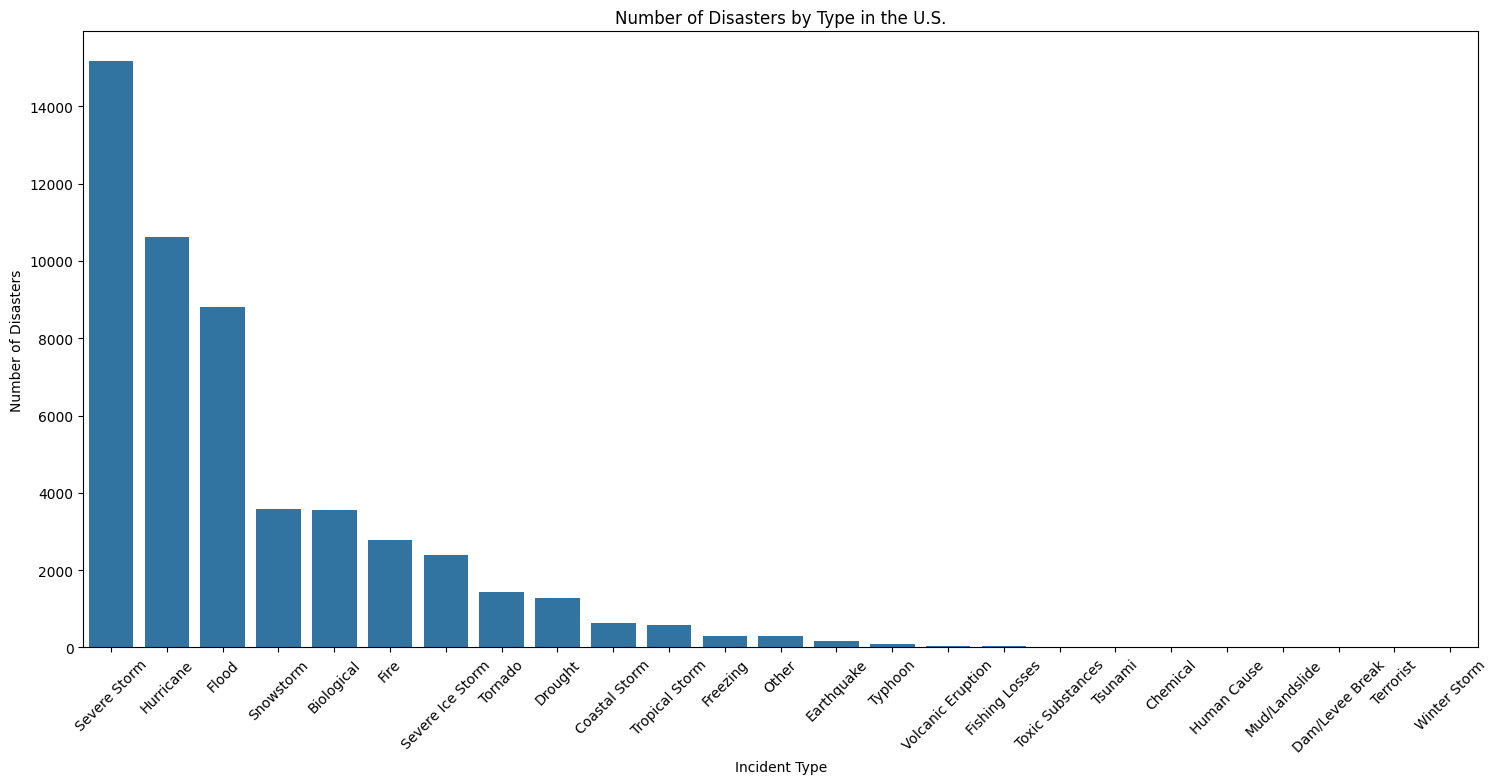

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Gets the number of disasters by the incident type
disasterCounts = disasterDeclaration_df["Incident Type"].value_counts()

#Bar graph of each of the number of disater by types
plt.figure(figsize=(18, 8))
sns.barplot(x=disasterCounts.index, y=disasterCounts.values)
plt.xticks(rotation=45)
plt.xlabel("Incident Type")
plt.ylabel("Number of Disasters")
plt.title("Number of Disasters by Type in the U.S.")
plt.show()

Summary Statistics:
1. Severe storms are the highest reported disaster type in the U.S. from the dataset. Severe storms have over 15,000 occurrences.
2. The three most common disaster types are severe storms, hurricanes, and floods. Each of these natural disasters have over 8,000 occurrences.
3. Winter Storms, mudslides, dam/levee breaks are the natural disasters that have the least amount of occurrences.
4. More than 70% of all recorded disasters from the dataset are storm related disasters which include: Severe storm, hurricanes, floods, and snow storms.

These statistics review frequency levels of natural disasters to see which occur the most.

The data shows that weather related events (storms, hurricanes, floods) are the highest occuring and recorded natural disasters in the FEMA’s Disaster Declarations Summaries, while geological disasters (earthquakes, volcanic eruptions, tsunamis) do not occur as often.

This is relevant to the research question because it shows which types of natural disasters occur the most frequently and have the greatest potential impact on the housing market.

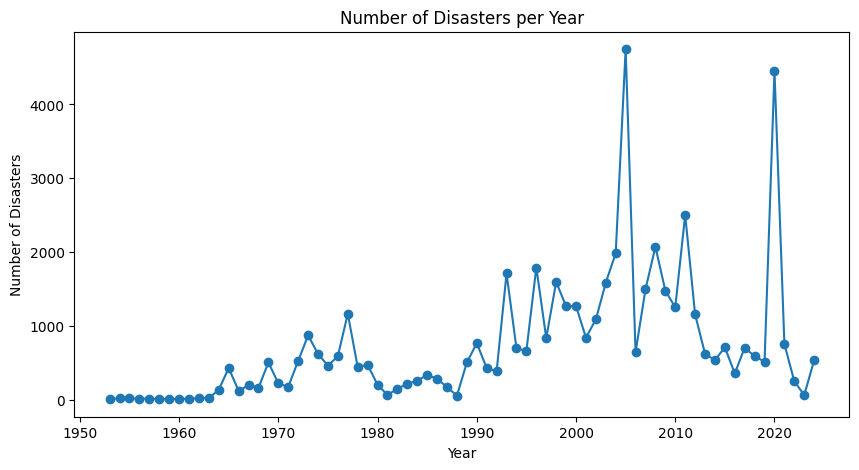

In [ ]:
disasterDeclaration_df['Incident Year'] = pd.to_datetime(disasterDeclaration_df['Incident Begin Date']).dt.year
disasters_per_year = disasterDeclaration_df['Incident Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(disasters_per_year.index, disasters_per_year.values, marker='o')
plt.title("Number of Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.show()

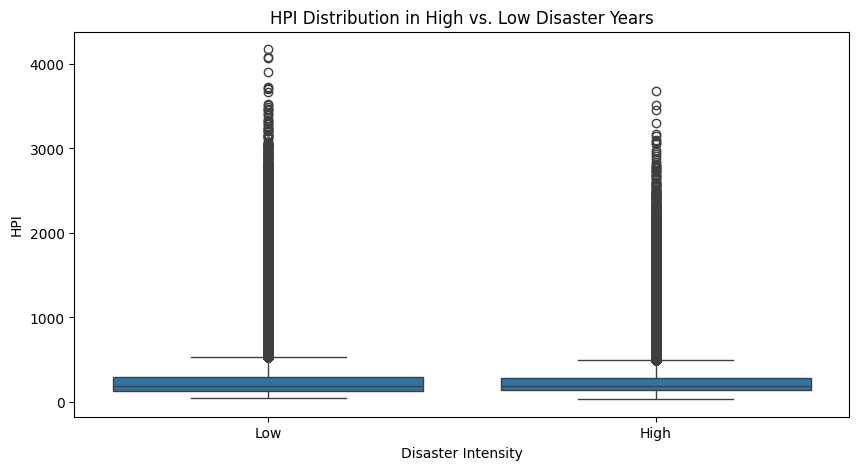

In [ ]:
# Define high disaster years
high_disaster_years = disasters_per_year[disasters_per_year > disasters_per_year.mean()].index
hpi_df['Disaster Intensity'] = hpi_df['Year'].apply(lambda x: 'High' if x in high_disaster_years else 'Low')

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(data=hpi_df, x='Disaster Intensity', y='HPI')
plt.title('HPI Distribution in High vs. Low Disaster Years')
plt.show()

In [ ]:
print(zip_state_df.dtypes)

zip                  object
lat                 float64
lng                 float64
city                 object
state_id             object
state_name           object
zcta                   bool
parent_zcta         float64
population          float64
density             float64
county_fips           int64
county_name          object
county_weights       object
county_names_all     object
county_fips_all      object
imprecise              bool
military               bool
timezone             object
dtype: object


In [ ]:
zip_state_df.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,00601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16721.0,100.2,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,00602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37510.0,477.6,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,00603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,48317.0,543.1,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,00606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5435.0,47.3,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,00610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25413.0,264.4,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


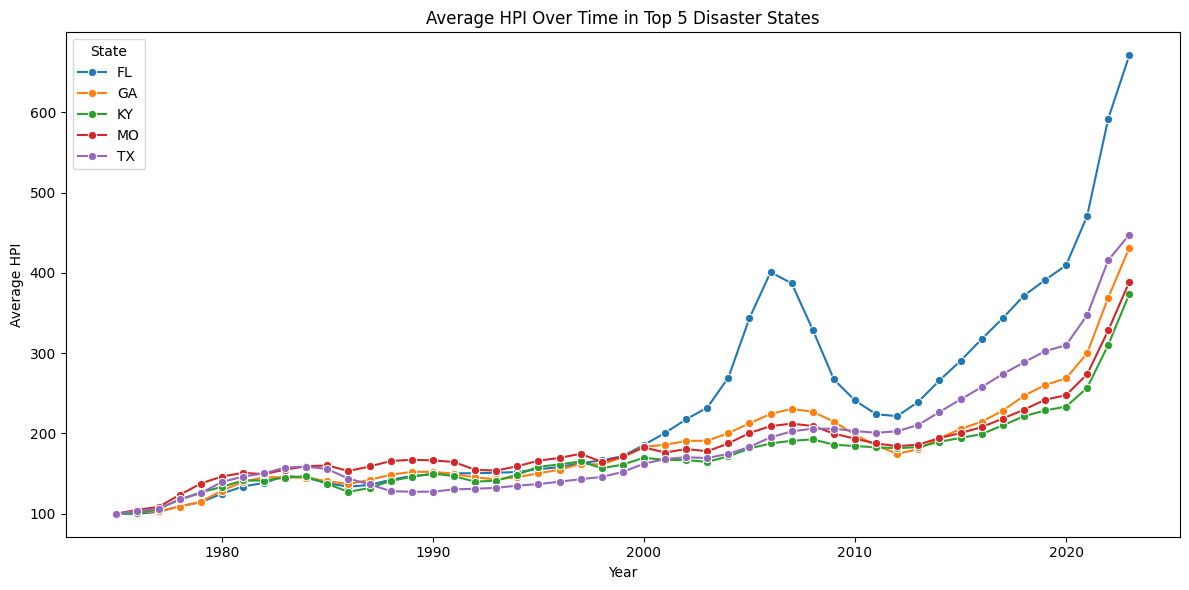

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make Year numeric
hpi_df['Year'] = pd.to_numeric(hpi_df['Year'], errors='coerce')
hpi_df = hpi_df.dropna(subset=['Year'])

# Merge with ZIP-to-state info
merged_hpi = hpi_df.merge(zip_state_df, left_on='Five-Digit ZIP Code', right_on='zip')

# Get top 5 states with most disasters
top_states = disasterDeclaration_df['state'].value_counts().head(5).index

# Filter to top disaster states only
merged_top = merged_hpi[merged_hpi['state_id'].isin(top_states)]

# Group by state and year, calculate average HPI
avg_hpi_by_year = merged_top.groupby(['state_id', 'Year'])['HPI'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_hpi_by_year, x='Year', y='HPI', hue='state_id', marker='o')
plt.title("Average HPI Over Time in Top 5 Disaster States")
plt.xlabel("Year")
plt.ylabel("Average HPI")
plt.legend(title="State")
plt.tight_layout()
plt.show()

## Table 3:

The next dataset we are working with is the US ZIP Codes Database by SimpleMaps.

This dataset comes from SimpleMaps: https://simplemaps.com/data/us-zips

This dataset provides detailed information about every ZIP code in the United States, including the state, population, and geographic coordinates. We chose this dataset to map ZIP codes from the HPI dataset to their respective states, allowing for state-level aggregation and analysis of housing trends. A question we have for this dataset is whether geographic or demographic factors associated with ZIP codes influence housing price sensitivity to natural disasters.